In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [111]:
from sklearn.datasets import load_diabetes

def make_dataset():
    dataset = load_diabetes()
#     df = pd.DataFrame(dataset.data, columns = features_names)
#     df['target'] = dataset.target
#     X_train, X_test, y_train, y_test = train_test_split(
#         df.drop('target', axis = 1), df['target'],
#         test_size = 0.2, random_state = 1004
#     )
    df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
    X_train, X_test, y_train, y_test = train_test_split(
        df, pd.DataFrame({'target': dataset.target}),
        test_size = 0.2, random_state = 1004
    )

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353, 1), (89, 1))

In [112]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070073,0.039710,0.066952,-0.065491,0.108111,0.026714,0.073480
417,-0.052738,-0.044642,0.071397,-0.074528,-0.015328,-0.001314,0.004460,-0.021412,-0.046879,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073410,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056158,-0.059067


In [113]:
y_train.head()

,target
152,292.0
417,55.0
172,295.0
438,104.0
296,89.0


array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

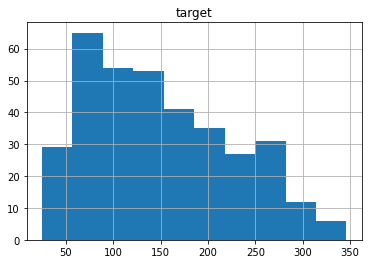

In [114]:
y_train.hist()

In [115]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred)
mean_squared_error(y_test, pred)

[[123.94932306]
 [136.23345464]
 [156.67558068]
 [ 97.09312563]
 [154.73346498]
 [174.10316418]
 [142.4929304 ]
 [175.46825347]
 [ 67.56458933]
 [197.51586051]
 [141.36718175]
 [162.25207736]
 [207.90332878]
 [112.21593607]
 [164.7869123 ]
 [152.83451856]
 [207.62617695]
 [101.69114321]
 [169.47144497]
 [198.91006938]
 [156.10499095]
 [112.52480518]
 [208.1016705 ]
 [133.78986882]
 [190.71735877]
 [231.24393545]
 [ 82.20284932]
 [155.20014088]
 [186.03833321]
 [183.10229854]
 [215.52927072]
 [202.32401575]
 [162.1604779 ]
 [ 58.08091438]
 [ 84.50046958]
 [ 92.02007658]
 [141.60209908]
 [ 82.31384102]
 [175.37499688]
 [250.32383794]
 [170.56433203]
 [202.54663866]
 [238.35235958]
 [ 87.97433558]
 [242.65146724]
 [179.97059096]
 [167.91318627]
 [125.63718995]
 [ 96.59340383]
 [160.6500302 ]
 [134.36973916]
 [211.35345939]
 [112.36128251]
 [146.79992581]
 [175.73058868]
 [ 80.91216342]
 [183.4067591 ]
 [121.91976399]
 [ 73.8960861 ]
 [121.59781222]
 [199.23595635]
 [203.59669391]
 [235.90

2707.6236708320457

In [116]:
# 릿지회귀
from sklearn.linear_model import Ridge

model = Ridge(alpha = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
#print(pred)
mean_squared_error(y_test, pred)

3522.1129142470336

In [117]:
# 회귀 계수
coef = pd.DataFrame(model.coef_.T, index = X_train.columns, columns = ["alpha1"])
coef
#type(model.coef_)

,alpha1
age,31.293287
sex,-71.449580
bmi,267.605153
bp,197.364745
s1,14.613106
s2,-13.884790
s3,-124.649955
s4,106.212968
s5,221.068052
s6,101.202651


In [24]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070073,0.039710,0.066952,-0.065491,0.108111,0.026714,0.073480
417,-0.052738,-0.044642,0.071397,-0.074528,-0.015328,-0.001314,0.004460,-0.021412,-0.046879,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073410,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056158,-0.059067


In [65]:
for alpha in range(11):
    model = Ridge(alpha = alpha)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    #print(pred)
    print(alpha, mean_squared_error(y_test, pred))
    
    if alpha == 0:
        coef = pd.DataFrame(model.coef_.T, index = X_train.columns, columns = ['alpha0'])
    else:
        coef['alpha' + str(alpha)] = model.coef_.T

0 2707.6236708320425
1 3522.1129142470336
2 4071.993595186569
3 4443.891292677976
4 4716.530377021632
5 4926.436108980303
6 5093.5541458704365
7 5229.969389363438
8 5343.5249856140335
9 5439.567835040425
10 5521.88231117606


In [66]:
coef

,alpha0,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10
age,-14.226237,31.293287,32.817917,30.432679,27.643231,25.090816,22.875265,20.974194,19.341064,17.930314,16.703159
sex,-252.596638,-71.449580,-34.043717,-19.528803,-12.386188,-8.364249,-5.891135,-4.272553,-3.162722,-2.373736,-1.796452
bmi,478.237599,267.605153,190.056590,148.962703,123.014050,104.982097,91.662765,81.395638,73.226624,66.565518,61.026348
bp,374.575253,197.364745,142.616148,112.997014,93.982363,80.610241,70.645425,62.912288,56.726889,51.661804,47.435152
s1,-1027.276426,14.613106,26.449578,28.124170,27.264947,25.719968,24.057164,22.465138,21.002520,19.680151,18.491225
s2,669.703861,-13.884790,7.197698,13.801173,15.894953,16.303298,16.024912,15.464192,14.799108,14.111668,13.440080
s3,228.639350,-124.649955,-96.623143,-79.242455,-67.286548,-58.517128,-51.794417,-46.469977,-42.145396,-38.561508,-35.542084
s4,209.055969,106.212968,91.101508,78.615389,68.833249,61.103413,54.884584,49.789790,45.546937,41.962472,38.896129
s5,787.865881,221.068052,161.287237,128.831057,107.790246,92.863138,81.659999,72.915725,65.888724,60.112178,55.276214
s6,51.760485,101.202651,87.102374,74.545503,64.797302,57.196124,51.149249,46.239680,42.180395,38.770967,35.868345


In [53]:
coef

,alpha1,alpha10
age,31.293287,16.703159
sex,-71.449580,-1.796452
bmi,267.605153,61.026348
bp,197.364745,47.435152
s1,14.613106,18.491225
s2,-13.884790,13.440080
s3,-124.649955,-35.542084
s4,106.212968,38.896129
s5,221.068052,55.276214
s6,101.202651,35.868345


In [62]:
model.coef_.T

array([[  -14.2262365 ],
       [ -252.59663757],
       [  478.23759862],
       [  374.57525253],
       [-1027.27642557],
       [  669.70386131],
       [  228.63934981],
       [  209.05596853],
       [  787.86588112],
       [   51.76048542]])

In [118]:
# 릿지회귀
from sklearn.linear_model import Lasso

model = Lasso(alpha = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
#print(pred)
mean_squared_error(y_test, pred)

4179.146884323723

In [119]:
alphas = [0.01, 0.1, 0.5] + list(range(1, 11))

for i in range(len(alphas)):
    model = Lasso(alpha = alphas[i])
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    #print(pred)
    print(alphas[i], mean_squared_error(y_test, pred))
    
    if i == 0:
        coef = pd.DataFrame(model.coef_.T, index = X_train.columns, columns = ['alpha' + str(alphas[i])])
    else:
        coef['alpha' + str(alphas[i])] = model.coef_.T

0.01 2676.3844653651836
0.1 2775.180919040914
0.5 3375.239175083079
1 4179.146884323723
2 6398.637179448666
3 6595.844885678807
4 6595.844885678807
5 6595.844885678807
6 6595.844885678807
7 6595.844885678807
8 6595.844885678807
9 6595.844885678807
10 6595.844885678807


In [120]:
coef

,alpha0.01,alpha0.1,alpha0.5,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10
age,-2.721845,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sex,-239.368344,-158.093840,-0.000000,-0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bmi,484.703250,482.606228,445.966321,343.588370,42.963888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bp,364.263056,319.756824,177.289868,46.375388,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s1,-500.344995,-38.639492,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s2,254.417506,-0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s3,-0.000000,-185.530318,-22.237155,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
s4,139.252171,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s5,591.410695,429.129707,356.354312,245.167660,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s6,50.870178,18.532354,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
# Q. 라쏘 회귀의 alpha 값을 0.001, 0.01, 0.05, 0.1, 1, 10을 각각 넣어보고,
# 어떤 alpha 값이 가장 mean squared error가 작은지 찾아보세요.
from sklearn.linear_model import Lasso
alpha_list = [0.001, 0.01, 0.05, 0.1, 1, 10]
mse_dic = {}
for alpha in alpha_list:
    model = Lasso(alpha = alpha)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    mse_dic[alpha] = mse

min(mse_dic.items(), key = lambda x : x[1])

(0.01, 2676.3844653651836)

In [122]:
#엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
#print(pred)
mean_squared_error(y_test, pred)

6539.270795233337

In [125]:
#엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha = 0.001, l1_ratio = 0.6)
model.fit(X_train, y_train)
pred = model.predict(X_test)
#print(pred)
mean_squared_error(y_test, pred)

2785.1803654836626

In [126]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

/tmp/ipykernel_31/998283942.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


3381.7931505617976

In [127]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4028.2455020344587

In [128]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {'learning_rate': [0.07, 0.05],
          'max_depth': [3, 5, 7],
          'n_estimators': [100, 200],
          'subsample': [0.9, 0.8, 0.7]
         }

# 데이터 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

In [129]:
#GridSearchCV
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv = 3, n_jobs = -1)
grid.fit(X, y)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [97]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [99]:
#하이퍼파라미터 튜닝
# xbg = XGBRegressor(
#     learning_rate = 0.05,
#     max_depth = 3,
#     n_estimator = 100,
#     subsample = 0.7
# )
xgb = XGBRegressor(**grid.best_params)
xgb.fit(X_train, y_train)
perd = xgb.predict(X_test)
mean_squared_error(y_test, pred)

4028.2455020344587

In [100]:
#RandomizedSearchCV
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv = 3, n_iter = 10, n_jobs = -1)
grid.fit(X, y)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [106]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

49.95669229914633

In [107]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

63.46846068745057

In [108]:
#RMSLE
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_test, pred))

0.46858782885338846

In [109]:
# R2
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.38476764985992584

In [110]:
import numpy as np

params={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
        'l1_ratio': list(np.arrange(0.1, 1, 0.1))}

from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X, y)
pred = model.predict(X)

from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(model, params, cv = 3, n_iter = 20, n_jobs = -1)
grid.fit(X, y)

AttributeError: module 'numpy' has no attribute 'arrange'